# 1) Import Libraries and Clean the Data

In [188]:
## Import our libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [122]:
## import dataset
online_shoppers_df = pd.read_csv("Dataset/online_shoppers_intention.csv")
online_shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [123]:
# obtain basic information regarding the dataset
online_shoppers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [127]:
# Drop any duplicated rows and keep the first value
droped_duplicates = online_shoppers_df.drop_duplicates(subset = None, keep = 'first')

In [128]:
# check info again to see if anything has changed
droped_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12209 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12209 non-null  int64  
 1   Administrative_Duration  12209 non-null  float64
 2   Informational            12081 non-null  float64
 3   Informational_Duration   12209 non-null  float64
 4   ProductRelated           12209 non-null  int64  
 5   ProductRelated_Duration  12209 non-null  float64
 6   BounceRates              12209 non-null  float64
 7   ExitRates                12209 non-null  float64
 8   PageValues               12074 non-null  float64
 9   SpecialDay               12209 non-null  float64
 10  Month                    12209 non-null  object 
 11  OperatingSystems         12086 non-null  float64
 12  Browser                  12209 non-null  int64  
 13  Region                   12209 non-null  int64  
 14  TrafficType           

In [129]:
# Find the amount of null values each column has
droped_duplicates.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [130]:
# Fill the null values with the first and last value of the data set
droped_duplicates.fillna(method = 'pad', inplace = True)
# check to see the null values were filled in
droped_duplicates.isnull().sum()

In [132]:
# obtain the basic statistics about the dataset
droped_duplicates.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000,12209.000000
mean,2.338111,81.619581,0.508395,34.814044,32.035466,1206.587017,0.020429,0.041518,5.954906,0.061922,2.123761,2.357605,3.152674,4.073225
std,3.330160,177.468917,1.274800,141.403041,44.589883,1919.411198,0.045365,0.046244,18.698103,0.199637,0.906508,1.709887,2.402206,4.016212
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,192.875000,0.000000,0.014251,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.833333,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.600000,0.000000,0.000000,38.000000,1476.500000,0.016667,0.048611,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [133]:
# Do we need this here???
droped_duplicates.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [209]:
# obtain the numeric columns to get the correlation 
correlation = droped_duplicates.drop(columns = ["VisitorType", "Weekend","Revenue", 'Month'])
correlation.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.600493,0.368660,0.254846,0.428396,0.371237,-0.213442,-0.311419,0.097174,-0.096870,-0.006021,-0.025537,-0.007078,-0.034520
Administrative_Duration,0.600493,1.000000,0.297470,0.237237,0.286935,0.353643,-0.137153,-0.202092,0.066145,-0.074615,-0.005982,-0.015687,-0.006609,-0.014911
Informational,0.368660,0.297470,1.000000,0.614804,0.369192,0.382117,-0.107708,-0.157753,0.048840,-0.049228,-0.009299,-0.037829,-0.030431,-0.033766
Informational_Duration,0.254846,0.237237,0.614804,1.000000,0.279114,0.346621,-0.070017,-0.102930,0.032031,-0.031236,-0.010495,-0.019543,-0.027824,-0.025083
ProductRelated,0.428396,0.286935,0.369192,0.279114,1.000000,0.860349,-0.193276,-0.286290,0.055716,-0.025766,0.006005,-0.013504,-0.039920,-0.044099
ProductRelated_Duration,0.371237,0.353643,0.382117,0.346621,0.860349,1.000000,-0.174186,-0.245483,0.051491,-0.038055,0.004498,-0.007650,-0.034700,-0.037279
BounceRates,-0.213442,-0.137153,-0.107708,-0.070017,-0.193276,-0.174186,1.000000,0.902538,-0.115083,0.087994,0.023808,-0.015922,0.001752,0.088280
ExitRates,-0.311419,-0.202092,-0.157753,-0.102930,-0.286290,-0.245483,0.902538,1.000000,-0.172571,0.116600,0.014141,-0.003716,-0.001874,0.086725
PageValues,0.097174,0.066145,0.048840,0.032031,0.055716,0.051491,-0.115083,-0.172571,1.000000,-0.065863,0.018384,0.045800,0.009637,0.012029
SpecialDay,-0.096870,-0.074615,-0.049228,-0.031236,-0.025766,-0.038055,0.087994,0.116600,-0.065863,1.000000,0.013505,0.003564,-0.016367,0.052905


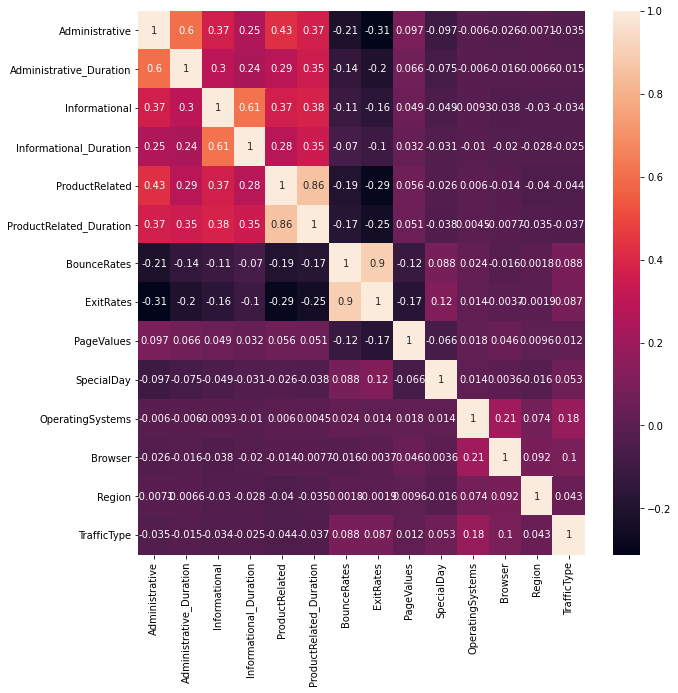

In [210]:
# Build a head map to help visualize the correlation dataframe from above
fig = plt.figure(figsize = (10,10))
sns.heatmap(correlation.corr(),annot = True)
plt.show()

### We decided to drop the columns below as the correlation was low when compared to the other columns and a few of them do not make sense to predicting Revenue. If a person has a Mac Windows or Linux Operating system are they more inclined to purchasing something off the interent. Traffic type helps measure where there traffic came from and weather they need to invest in obtianing more traffic through ads.

In [138]:
clean_df = droped_duplicates.drop(columns = ["SpecialDay","OperatingSystems","Browser", "Region", "TrafficType"])
clean_df.head()

# Exploratory Data Analysis

In [208]:
#for column in clean_df.columns[0:8]:
 #   plt.figure(figsize = (5,5))
  #  plt.hist(clean_df[column])
   # plt.ylabel("Frequency")
    #plt.title(f"Histogram of {column}")
    #plt.show()

### Plot hsitorgrams and boxplots to see if there are outliers or if the data is skewed

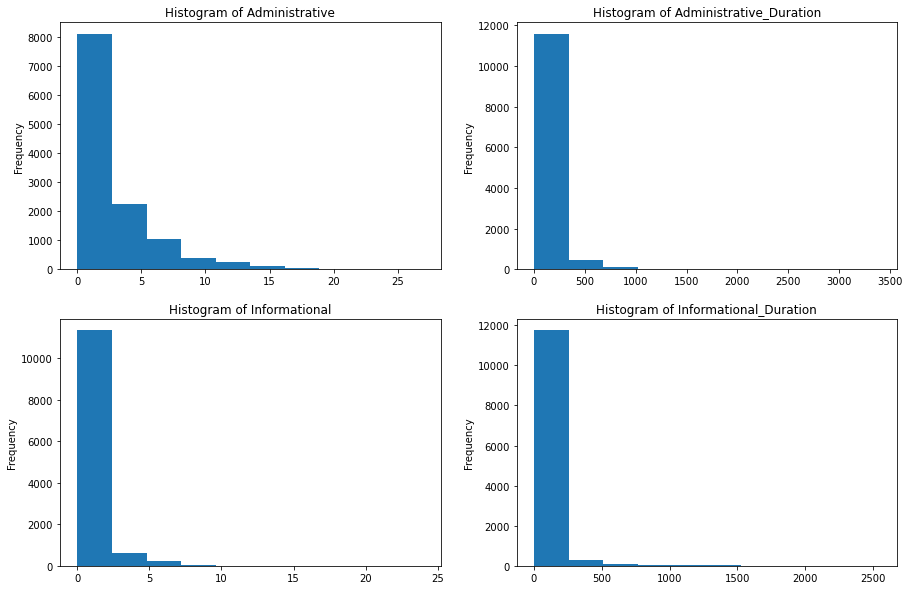

In [141]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.hist(clean_df['Administrative'])
plt.ylabel("Frequency")
plt.title("Histogram of Administrative")

plt.subplot(2,2,2)
plt.hist(clean_df['Administrative_Duration'])
plt.ylabel("Frequency")
plt.title("Histogram of Administrative_Duration")

plt.subplot(2,2,3)
plt.hist(clean_df['Informational'])
plt.ylabel("Frequency")
plt.title("Histogram of Informational")

plt.subplot(2,2,4)
plt.hist(clean_df['Informational_Duration'])
plt.ylabel("Frequency")
plt.title("Histogram of Informational_Duration");

plt.show()

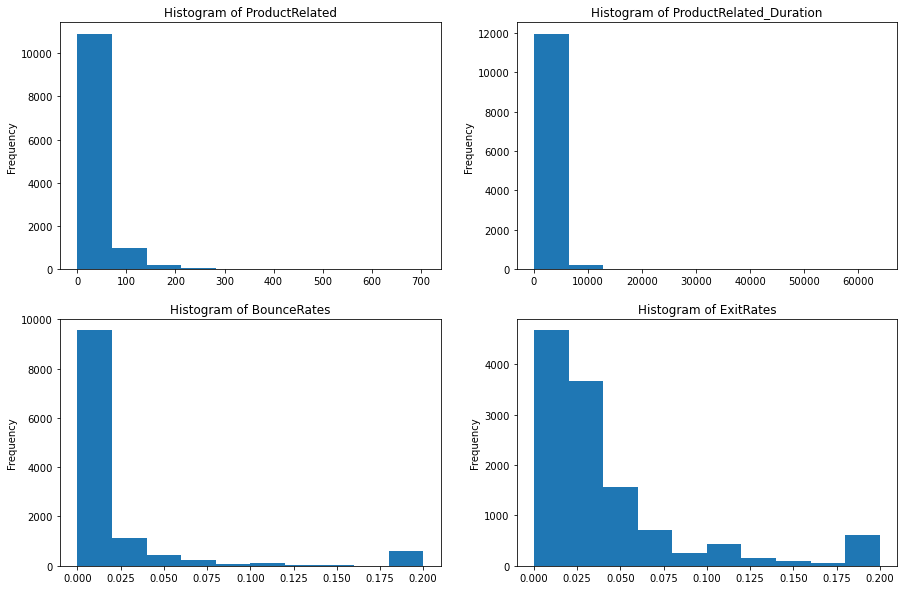

In [142]:
fig= plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.hist(clean_df['ProductRelated'])
plt.ylabel("Frequency")
plt.title("Histogram of ProductRelated")

plt.subplot(2,2,2)
plt.hist(clean_df['ProductRelated_Duration'])
plt.ylabel("Frequency")
plt.title("Histogram of ProductRelated_Duration")

plt.subplot(2,2,3)
plt.hist(clean_df['BounceRates'])
plt.ylabel("Frequency")
plt.title("Histogram of BounceRates")

plt.subplot(2,2,4)
plt.hist(clean_df['ExitRates'])
plt.ylabel("Frequency")
plt.title("Histogram of ExitRates");

plt.show()

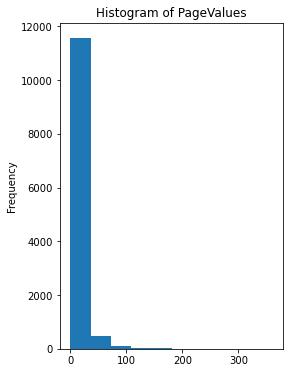

In [143]:
figure = plt.figure(figsize = (4,6))
plt.hist(clean_df['PageValues'])
plt.ylabel("Frequency")
plt.title("Histogram of PageValues");
plt.show()

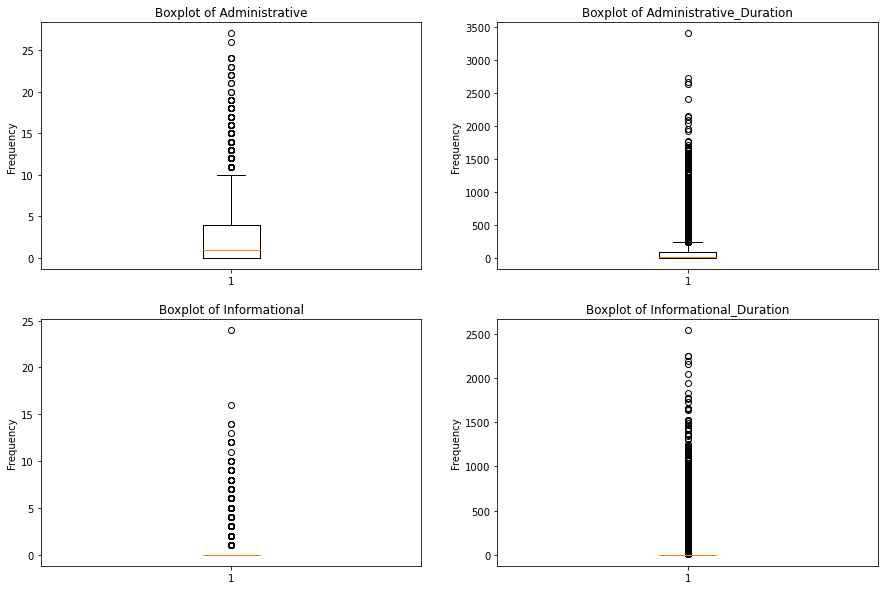

In [144]:
fig= plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.boxplot(clean_df['Administrative'])
plt.ylabel("Frequency")
plt.title("Boxplot of Administrative")

plt.subplot(2,2,2)
plt.boxplot(clean_df['Administrative_Duration'])
plt.ylabel("Frequency")
plt.title("Boxplot of Administrative_Duration")

plt.subplot(2,2,3)
plt.boxplot(clean_df['Informational'])
plt.ylabel("Frequency")
plt.title("Boxplot of Informational")

plt.subplot(2,2,4)
plt.boxplot(clean_df['Informational_Duration'])
plt.ylabel("Frequency")
plt.title("Boxplot of Informational_Duration");

plt.show()

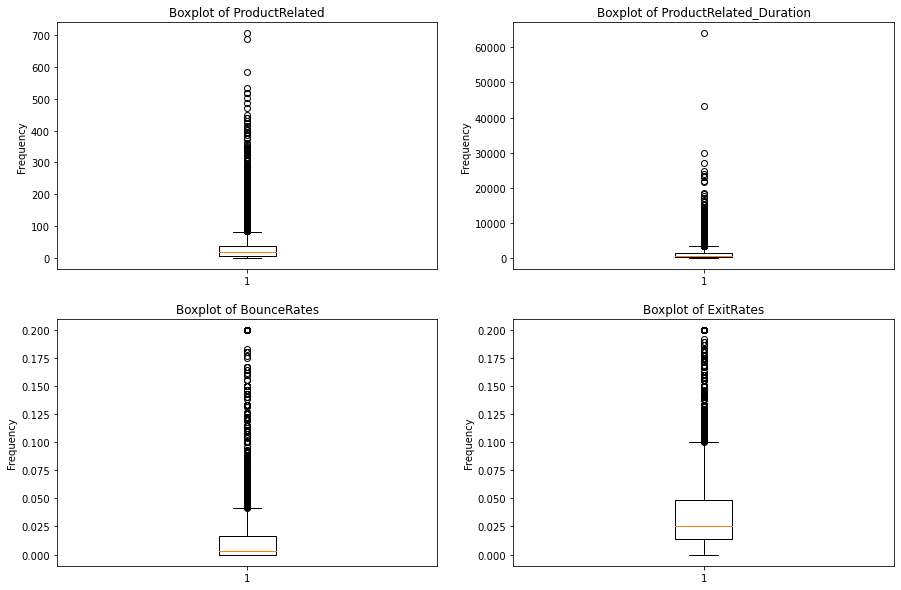

In [145]:
fig= plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.boxplot(clean_df['ProductRelated'])
plt.ylabel("Frequency")
plt.title("Boxplot of ProductRelated")

plt.subplot(2,2,2)
plt.boxplot(clean_df['ProductRelated_Duration'])
plt.ylabel("Frequency")
plt.title("Boxplot of ProductRelated_Duration")

plt.subplot(2,2,3)
plt.boxplot(clean_df['BounceRates'])
plt.ylabel("Frequency")
plt.title("Boxplot of BounceRates")

plt.subplot(2,2,4)
plt.boxplot(clean_df['ExitRates'])
plt.ylabel("Frequency")
plt.title("Boxplot of ExitRates");

plt.show()

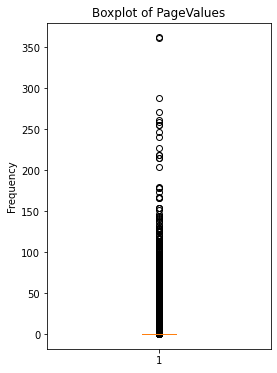

In [146]:
figure = plt.figure(figsize = (4,6))
plt.boxplot(clean_df['PageValues'])
plt.ylabel("Frequency")
plt.title("Boxplot of PageValues");
plt.show()

* From the plots above we can see that most of the columns have outliers and the data is skewed. Since there are many outliers we are going to keep them becuase if we filter them out then alot of  data would be lost.

In [147]:
# Check are target metric to see the this is skewed
clean_df['Revenue'].value_counts()

False    10301
True      1908
Name: Revenue, dtype: int64

In [150]:
# Group data by revenue, month and the pagevalue reset the index so it is easier to plot the relationship among these varaibles
groupby_revenue = clean_df.groupby(['Revenue', 'Month'], as_index = False)[["PageValues"]].mean()
groupby_revenue.head()

,Revenue,Month,PageValues
0,False,Aug,1.928164
1,False,Dec,2.515348
2,False,Feb,0.628850
3,False,Jul,2.032590
4,False,June,1.875025


In [151]:
# sort the data set between the False and True becuase when we plot the scatter plot this will help with the legend 
true_groupby = groupby_revenue[groupby_revenue['Revenue'] == True]
false_groupby = groupby_revenue[groupby_revenue['Revenue'] == False]

In [152]:
true_groupby.head()

,Revenue,Month,PageValues
10,True,Aug,24.456123
11,True,Dec,36.924486
12,True,Feb,17.297136
13,True,Jul,16.113984
14,True,June,17.128564


In [153]:
false_groupby.head()

,Revenue,Month,PageValues
0,False,Aug,1.928164
1,False,Dec,2.515348
2,False,Feb,0.628850
3,False,Jul,2.032590
4,False,June,1.875025


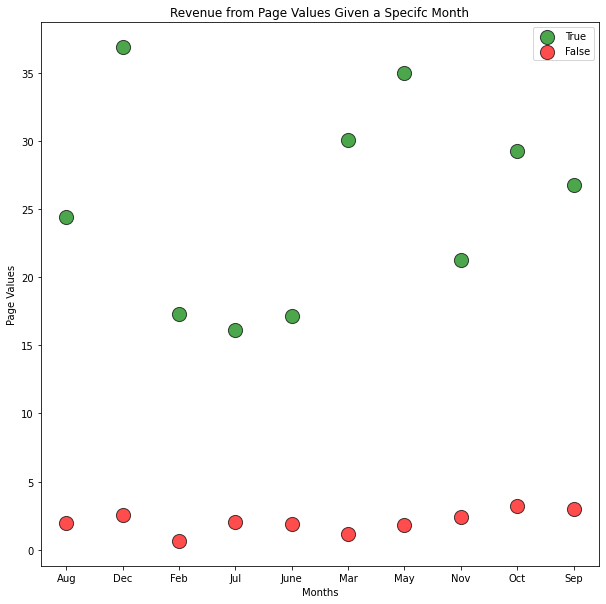

In [154]:
# create a scatter plot to show the relationship between if the amount of page values relates to if revenue was made, grouped by the month.
fig = plt.figure(figsize = (10,10))
plt.scatter(true_groupby["Month"], 
            true_groupby["PageValues"], 
            c= "green",
            label = True,
            alpha = .7,
            edgecolor = "k",
            s = 200)

plt.scatter(false_groupby["Month"], 
            false_groupby["PageValues"], 
            c= "red",
            label = False,
            alpha = .7,
            edgecolor = "k",
            s = 200)
plt.legend()
plt.xlabel("Months")
plt.ylabel("Page Values")
plt.title("Revenue from Page Values Given a Specifc Month")
plt.show();

### Given this chart we can see that the higher the page value the more likely it was to generate revenue for that given month. The months of January and April are not listed in this dataset so the revenue for these two months is unknown. 

In [155]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12209 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12209 non-null  int64  
 1   Administrative_Duration  12209 non-null  float64
 2   Informational            12209 non-null  float64
 3   Informational_Duration   12209 non-null  float64
 4   ProductRelated           12209 non-null  int64  
 5   ProductRelated_Duration  12209 non-null  float64
 6   BounceRates              12209 non-null  float64
 7   ExitRates                12209 non-null  float64
 8   PageValues               12209 non-null  float64
 9   Month                    12209 non-null  object 
 10  VisitorType              12209 non-null  object 
 11  Weekend                  12209 non-null  bool   
 12  Revenue                  12209 non-null  bool   
dtypes: bool(2), float64(7), int64(2), object(2)
memory usage: 1.1+ MB


In [156]:
# review the information above and make any neccessary changes to the data type, vistortype and month
clean_df["VisitorType"] = clean_df['VisitorType'].astype("category")
clean_df["Month"] = clean_df['Month'].astype("category")

In [157]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12209 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12209 non-null  int64   
 1   Administrative_Duration  12209 non-null  float64 
 2   Informational            12209 non-null  float64 
 3   Informational_Duration   12209 non-null  float64 
 4   ProductRelated           12209 non-null  int64   
 5   ProductRelated_Duration  12209 non-null  float64 
 6   BounceRates              12209 non-null  float64 
 7   ExitRates                12209 non-null  float64 
 8   PageValues               12209 non-null  float64 
 9   Month                    12209 non-null  category
 10  VisitorType              12209 non-null  category
 11  Weekend                  12209 non-null  bool    
 12  Revenue                  12209 non-null  bool    
dtypes: bool(2), category(2), float64(7), int64(2)
memory usage: 1

The numeric variables within the clean_df are Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration,
BounceRates, ExitRates, PageValues. The Month, VisitorType, Weekend and Revenue are all categorical data.

In [158]:
## replace the target variable 'Revenue' with a 1 or a 0 and then use a classification model to make predictions.
clean_df['Revenue_encoded'] = 0
clean_df.loc[clean_df['Revenue'] == True, 'Revenue_encoded'] = 1
clean_df.loc[clean_df['Revenue']== False, 'Revenue_encoded'] = 0
## convert the weekend to a string so we can encode the column properly
clean_df['Weekend_encoded'] = 0
clean_df.loc[clean_df['Weekend'] == True, 'Weekend_encoded'] = 'True'
clean_df.loc[clean_df['Weekend']== False, 'Weekend_encoded'] = "False"

In [159]:
clean_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Weekend,Revenue,Revenue_encoded,Weekend_encoded
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,Feb,Returning_Visitor,False,False,0,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,Feb,Returning_Visitor,False,False,0,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,Feb,Returning_Visitor,False,False,0,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,Feb,Returning_Visitor,False,False,0,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,Feb,Returning_Visitor,True,False,0,True


In [160]:
# check to make sure the column is properly encoded
clean_df['Revenue'].value_counts()

False    10301
True      1908
Name: Revenue, dtype: int64

In [161]:
clean_df['Revenue_encoded'].value_counts()

0    10301
1     1908
Name: Revenue_encoded, dtype: int64

In [162]:
# check to mke sure the column is properly encoded
clean_df['Weekend'].value_counts()

False    9350
True     2859
Name: Weekend, dtype: int64

In [163]:
clean_df['Weekend_encoded'].value_counts()

False    9350
True     2859
Name: Weekend_encoded, dtype: int64

In [164]:
## We can see here that the Revenue column has been properly encoded and we can see that 0 and false have the same counts and True has the same counts
## we can no drop the Revenue column and finish encodeing the rest of the dataset
drop_rev = clean_df.drop(columns = ['Revenue', "Weekend"])
drop_rev.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType,Revenue_encoded,Weekend_encoded
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,Feb,Returning_Visitor,0,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,Feb,Returning_Visitor,0,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,Feb,Returning_Visitor,0,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,Feb,Returning_Visitor,0,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,Feb,Returning_Visitor,0,True


In [165]:
## split data into X and y for traing and testing purposes
X = drop_rev.drop(columns ='Revenue_encoded')
X = pd.get_dummies(X)
y = drop_rev['Revenue_encoded'].to_frame()

In [166]:
y['Revenue_encoded'].value_counts()
# As we can see we have more zero values thatn 1 values or more False than True so I data is imbalanced 

0    10301
1     1908
Name: Revenue_encoded, dtype: int64

In [167]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month_Aug,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_encoded_False,Weekend_encoded_True
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [168]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [169]:
# Scale the training data
x_scaler = StandardScaler()

In [170]:
x_scaler.fit(X_train)
X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [171]:
# we can see from the above that our dependent variable has way more 0s than 1 or hs more FALSE values tha TRUE values
# if this is not handled the model will most likely predict False for all the predicted values and give a high accurac score based off this however this is not good
# becuase the model will only learn how to predict false and not true
# we will incorporate SMOTE to balance the True and False values

In [172]:
# incorporate SMOTE 
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
X_train_scaled, y_train)

In [173]:
Counter(y_resampled)

Counter({'Revenue_encoded': 1})

In [174]:
## As we can see above the values are now balanced we can now build our machine learning model
## Since this data set is small I will be using a simple Logistic regression model to make my predctions
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [175]:
predictions = model.predict(X_test_scaled)

In [176]:
# build confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    confusion_matrix, index=["Predicted True", "Predicted False"], columns=["Actual True", "Actual False"]
)

acc_score = accuracy_score(y_test, predictions)


In [177]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Actual True,Actual False
Predicted True,2209,327
Predicted False,122,395


Accuracy Score : 0.8529315427448412
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2536
           1       0.55      0.76      0.64       517

    accuracy                           0.85      3053
   macro avg       0.75      0.82      0.77      3053
weighted avg       0.88      0.85      0.86      3053



In [178]:
# try and optimoze the model...use the data from the correlation plot to find the VIF and see if there are any values with a high VIF
vif = correlation.drop(columns = ["SpecialDay","OperatingSystems","Browser", "Region", "TrafficType"])
vif.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0


In [179]:
# create a dataframe to obtain the VIF scores for the numeric variables that were used in the correlation minus the irrelevent columns that were dropped earlier in the Analysis
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])]
vif_df['variable'] = vif.columns
vif_df

,VIF,variable
0,2.644605,Administrative
1,2.041911,Administrative_Duration
2,2.084989,Informational
3,1.765859,Informational_Duration
4,6.312502,ProductRelated
5,6.006724,ProductRelated_Duration
6,4.972809,BounceRates
7,5.203721,ExitRates
8,1.077835,PageValues


In [180]:
# lets try rerunning the model but drop exitrates and prodcut_related


# Model 2

In [191]:
## split data into X and y for traing and testing purposes
X_2 = drop_rev.drop(columns = ['Revenue_encoded', 'ExitRates', 'ProductRelated', "BounceRates", 'Administrative'])
X_2 = pd.get_dummies(X)
y_2 = drop_rev['Revenue_encoded'].to_frame()

In [192]:
# split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, 
                                                    y_2, 
                                                    random_state=1)

In [193]:
# Scale the training data
x_scaler_2 = StandardScaler()

In [194]:
# fit and tranform the data to the scaler
x_scaler_2.fit(X_train)
X_train_scaled_2 = x_scaler_2.transform(X_train_2)
X_test_scaled_2 = x_scaler_2.transform(X_test_2)

In [195]:
# incorporate SMOTE 
X_resampled_2, y_resampled_2 = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
X_train_scaled_2, y_train_2)

In [205]:
model_2 = LogisticRegression(solver='lbfgs', random_state=1)
model_2.fit(X_resampled_2, y_resampled_2)
predictions_2 = model_2.predict(X_test_scaled_2)

In [206]:
# build confusion matrix
confusion_matrix_2 = confusion_matrix(y_test_2, predictions_2)
cm_df_2 = pd.DataFrame(
    confusion_matrix_2, index=["Predicted False", "Predicted True"], columns=["Actual False", "Actual True"]
)

acc_score_2 = accuracy_score(y_test_2, predictions_2)

In [207]:
# Displaying results
print("Confusion Matrix")
display(cm_df_2)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report(y_test_2, predictions_2))

Confusion Matrix


,Actual False,Actual True
Predicted False,2209,327
Predicted True,122,395


Accuracy Score : 0.8529315427448412
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2536
           1       0.55      0.76      0.64       517

    accuracy                           0.85      3053
   macro avg       0.75      0.82      0.77      3053
weighted avg       0.88      0.85      0.86      3053



When looking at the confusion matrix we can see that 2209 were predicted False and were actually False. We can also see that we predicted 395 values to be true and the actual value was true.
The mentioned values above are the True Positive (2209) and True Negatives (395). The False postives resulted in predicting 327 being predicted false when in reality they were true. The false negatives resulted in prediticting 122 being True when in reality they were meant to be false. 

The accruacy score is 85% which takes into consideration the predictions of both True and False. Since the data at first was skewed to have more False than postive this number could have also been skewed and inaccruate. However after using Smote the model was able to generalize better on the 1 (True). 

Precision measures how many of the positive predictions were correct. So for 0 (FALSE) we can see that it had a 95% precision score, it accruatly predicted the True Postive and True Negatives at a 95% precision rate. 

The recall is the measure of how many  POSITIVE cases the model predicted so it predcited a total of 87% to be positve cases.

F1 is the combination or average of the precision and recall scores to give an overall score of how well eah value was predcitded. 